In [1]:
import torch 
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as snsy
import matplotlib.pyplot as plt
import xgboost as xgb


In [2]:
ticker = "KCHOL.IS"

df = yf.download(
    ticker,
    start="2024-01-01",
    end="2025-11-01",
    interval="1h",
    progress=False
)

usd_try = yf.download(
    "TRY=X",
    start="2024-01-01",
    end="2025-11-01",
    interval="1h",
    progress=False
)

if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0] for col in df.columns]

if isinstance(usd_try.columns, pd.MultiIndex):
    usd_try.columns = [col[0] for col in usd_try.columns]

C:\Users\olcay\AppData\Local\Temp\ipykernel_17096\4053351371.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
C:\Users\olcay\AppData\Local\Temp\ipykernel_17096\4053351371.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usd_try = yf.download(


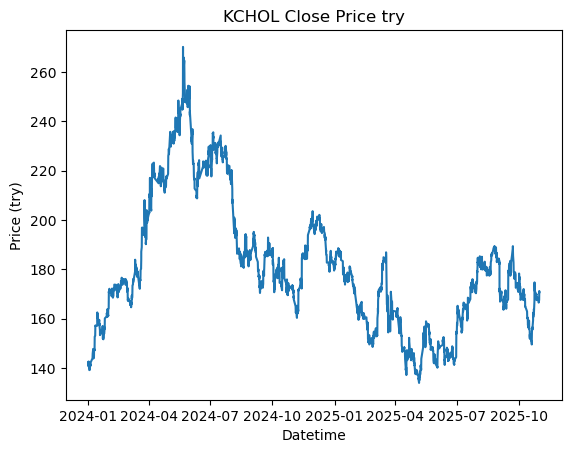

In [3]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df.index, df['Close'])
plt.title("KCHOL Close Price try")
plt.xlabel("Datetime")
plt.ylabel("Price (try)")
plt.show()


In [4]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()

usd_try = (
    usd_try[['Close']]
    .rename(columns={'Close': 'USD_TRY_Close'})
    .dropna()
)

In [5]:
usd_try_aligned = usd_try.reindex(
    df.index,
    method="ffill"
)

usd_try_aligned = usd_try_aligned.bfill()


data = df.join(usd_try_aligned, how="left")

data['Close_USD'] = data['Close'] / data['USD_TRY_Close']
data['High_USD']  = data['High']  / data['USD_TRY_Close']
data['Low_USD']   = data['Low']   / data['USD_TRY_Close']
data['Open_USD']  = data['Open']  / data['USD_TRY_Close']

data.head(15)

,Open,High,Low,Close,Volume,USD_TRY_Close,Close_USD,High_USD,Low_USD,Open_USD
Datetime,,,,,,,,,,
2024-01-02 06:30:00+00:00,142.300003,142.699997,141.600006,142.300003,1751262,29.681511,4.794230,4.807707,4.770647,4.794230
2024-01-02 07:30:00+00:00,142.300003,142.600006,141.300003,141.399994,1543804,29.700100,4.760927,4.801331,4.757560,4.791230
2024-01-02 08:30:00+00:00,141.399994,141.600006,140.600006,140.600006,1079048,29.703171,4.733502,4.767168,4.733502,4.760434
2024-01-02 09:30:00+00:00,140.500000,140.899994,140.500000,140.699997,766494,29.688299,4.739241,4.745977,4.732504,4.732504
2024-01-02 10:30:00+00:00,140.699997,141.199997,140.600006,140.699997,889252,29.713800,4.735173,4.752001,4.731808,4.735173
2024-01-02 11:30:00+00:00,140.699997,141.100006,140.500000,140.800003,800040,29.718000,4.737869,4.747964,4.727774,4.734504
2024-01-02 12:30:00+00:00,140.800003,141.600006,140.600006,141.399994,1610097,29.720730,4.757622,4.764352,4.730705,4.737434
2024-01-02 13:30:00+00:00,141.399994,143.300003,141.100006,142.600006,3600905,29.724001,4.797470,4.821020,4.747006,4.757098
2024-01-03 06:30:00+00:00,143.000000,143.000000,141.600006,141.699997,839255,29.775490,4.758948,4.802608,4.755589,4.802608


In [24]:
data = data[
    ['Open_USD', 'High_USD', 'Low_USD', 'Close_USD', 'Volume', 'USD_TRY_Close']
].copy()
data.head(15)

KeyError: "['USD_TRY_Close'] not in index"

In [7]:
data.index = data.index.tz_localize(None)
data.head(5)

,Open_USD,High_USD,Low_USD,Close_USD,Volume
Datetime,,,,,
2024-01-02 06:30:00,4.794230,4.807707,4.770647,4.794230,1751262
2024-01-02 07:30:00,4.791230,4.801331,4.757560,4.760927,1543804
2024-01-02 08:30:00,4.760434,4.767168,4.733502,4.733502,1079048
2024-01-02 09:30:00,4.732504,4.745977,4.732504,4.739241,766494
2024-01-02 10:30:00,4.735173,4.752001,4.731808,4.735173,889252


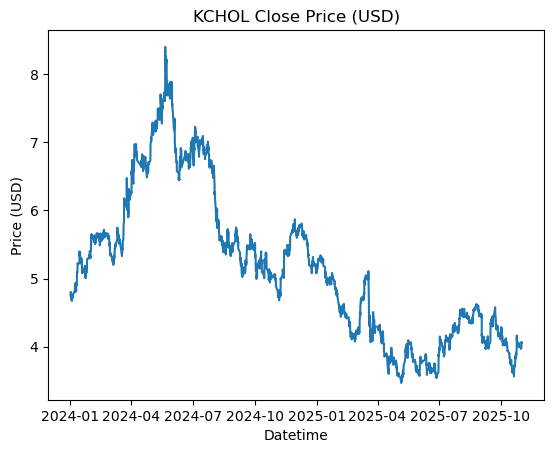

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(data.index, data['Close_USD'])
plt.title("KCHOL Close Price (USD)")
plt.xlabel("Datetime")
plt.ylabel("Price (USD)")
plt.show()


In [9]:
# TREND İNDİCATÖRLERİ
# EMA20
# EMA20
data['EMA20'] = data['Close_USD'].ewm(span=20, adjust=False).mean()

# EMA50
data['EMA50'] = data['Close_USD'].ewm(span=50, adjust=False).mean()


data["EMA_Cross_Ratio"] = (data["EMA20"] - data["EMA50"]) / data["EMA50"]
# yüzdelik farkın ortalamadan uzaklığını verir.
data['Distance_From_EMA_20'] = (data['Close_USD'] - data['EMA20']) / data['EMA20']


In [ ]:
data.tail() and data.head()

,Open_USD,High_USD,Low_USD,Close_USD,Volume,EMA20,EMA50,EMA_Cross_Ratio,Distance_From_EMA_20
Datetime,,,,,,,,,
2025-10-31 09:30:00,4.021394,4.057066,4.011881,4.045175,4212513,4.005420,3.964951,0.010207,0.009925
2025-10-31 10:30:00,4.042826,4.080877,4.042826,4.071364,4263258,4.011700,3.969124,0.010727,0.014872
2025-10-31 11:30:00,4.075330,4.075330,4.049161,4.061056,2368869,4.016401,3.972729,0.010993,0.011118
2025-10-31 12:30:00,4.059781,4.064538,4.047890,4.062160,3119182,4.020759,3.976236,0.011197,0.010297
2025-10-31 13:30:00,4.064420,4.066798,4.050150,4.059663,2807215,4.024464,3.979508,0.011297,0.008746


In [13]:
delta = data["Close_USD"].diff()

gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.ewm(alpha=1/14, adjust=False).mean()
avg_loss = loss.ewm(alpha=1/14, adjust=False).mean()

rs = avg_gain / avg_loss
data["RSI_14"] = 100 - (100 / (1 + rs))


ema_12 = data["Close_USD"].ewm(span=12, adjust=False).mean()
ema_26 = data["Close_USD"].ewm(span=26, adjust=False).mean()

data["MACD_Line"] = ema_12 - ema_26
data["MACD_Signal"] = data["MACD_Line"].ewm(span=9, adjust=False).mean()
data["MACD_Histogram"] = data["MACD_Line"] - data["MACD_Signal"]


In [14]:
data.head()

,Open_USD,High_USD,Low_USD,Close_USD,Volume,EMA20,EMA50,EMA_Cross_Ratio,Distance_From_EMA_20,RSI_14,MACD_Line,MACD_Signal,MACD_Histogram
Datetime,,,,,,,,,,,,,
2024-01-02 06:30:00,4.794230,4.807707,4.770647,4.794230,1751262,4.794230,4.794230,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
2024-01-02 07:30:00,4.791230,4.801331,4.757560,4.760927,1543804,4.791059,4.792924,-0.000389,-0.006289,0.000000,-0.002657,-0.000531,-0.002125
2024-01-02 08:30:00,4.760434,4.767168,4.733502,4.733502,1079048,4.785577,4.790594,-0.001047,-0.010882,0.000000,-0.006896,-0.001804,-0.005091
2024-01-02 09:30:00,4.732504,4.745977,4.732504,4.739241,766494,4.781164,4.788580,-0.001549,-0.008768,1.324732,-0.009680,-0.003379,-0.006301
2024-01-02 10:30:00,4.735173,4.752001,4.731808,4.735173,889252,4.776784,4.786486,-0.002027,-0.008711,1.311473,-0.012076,-0.005119,-0.006957


In [15]:
# VOLATILITY İNDİCATÖRLERİ
bb_middle = data['Close_USD'].rolling(window=20).mean()
bb_std = data['Close_USD'].rolling(window=20).std()

data['BB_Upper'] = bb_middle + 2 * bb_std
data['BB_Lower'] = bb_middle - 2 * bb_std
data['BB_Middle'] = bb_middle

# BB_Width
data['BB_Width'] = (
    data['BB_Upper'] - data['BB_Lower']
) / data['BB_Middle']

# BB_Percentage (%B)
data['BB_Percentage'] = (
    data['Close_USD'] - data['BB_Lower']
) / (data['BB_Upper'] - data['BB_Lower'])

# ATR 14
high_low = data['High_USD'] - data['Low_USD']
high_close = (data['High_USD'] - data['Close_USD'].shift()).abs()
low_close = (data['Low_USD'] - data['Close_USD'].shift()).abs()

true_range = pd.concat(
    [high_low, high_close, low_close],
    axis=1
).max(axis=1)
data['ATR_14'] = true_range.ewm(alpha=1/14, adjust=False).mean()
data['Normalized_ATR'] = data['ATR_14'] / data['Close_USD']


In [17]:
data.head() # => NaN kontrol

,Open_USD,High_USD,Low_USD,Close_USD,Volume,EMA20,EMA50,EMA_Cross_Ratio,Distance_From_EMA_20,RSI_14,MACD_Line,MACD_Signal,MACD_Histogram,BB_Upper,BB_Lower,BB_Middle,BB_Width,BB_Percentage,ATR_14,Normalized_ATR
Datetime,,,,,,,,,,,,,,,,,,,,
2024-01-02 06:30:00,4.794230,4.807707,4.770647,4.794230,1751262,4.794230,4.794230,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.037060,0.007730
2024-01-02 07:30:00,4.791230,4.801331,4.757560,4.760927,1543804,4.791059,4.792924,-0.000389,-0.006289,0.000000,-0.002657,-0.000531,-0.002125,NaN,NaN,NaN,NaN,NaN,0.037539,0.007885
2024-01-02 08:30:00,4.760434,4.767168,4.733502,4.733502,1079048,4.785577,4.790594,-0.001047,-0.010882,0.000000,-0.006896,-0.001804,-0.005091,NaN,NaN,NaN,NaN,NaN,0.037263,0.007872
2024-01-02 09:30:00,4.732504,4.745977,4.732504,4.739241,766494,4.781164,4.788580,-0.001549,-0.008768,1.324732,-0.009680,-0.003379,-0.006301,NaN,NaN,NaN,NaN,NaN,0.035563,0.007504
2024-01-02 10:30:00,4.735173,4.752001,4.731808,4.735173,889252,4.776784,4.786486,-0.002027,-0.008711,1.311473,-0.012076,-0.005119,-0.006957,NaN,NaN,NaN,NaN,NaN,0.034465,0.007279


In [19]:
data = data.dropna()
data.head()


,Open_USD,High_USD,Low_USD,Close_USD,Volume,EMA20,EMA50,EMA_Cross_Ratio,Distance_From_EMA_20,RSI_14,MACD_Line,MACD_Signal,MACD_Histogram,BB_Upper,BB_Lower,BB_Middle,BB_Width,BB_Percentage,ATR_14,Normalized_ATR
Datetime,,,,,,,,,,,,,,,,,,,,
2024-01-04 09:30:00,4.714097,4.740977,4.710736,4.730897,1010602,4.729515,4.756691,-0.005713,0.000292,31.126499,-0.020280,-0.020200,-0.000080,4.799745,4.662597,4.731171,0.028988,0.497999,0.038648,0.008169
2024-01-04 10:30:00,4.729753,4.729753,4.702879,4.712957,637471,4.727938,4.754976,-0.005686,-0.003169,29.373712,-0.019104,-0.019981,0.000877,4.789281,4.664934,4.727107,0.026305,0.386200,0.037889,0.008039
2024-01-04 11:30:00,4.713479,4.736996,4.706760,4.723558,648227,4.727521,4.753744,-0.005516,-0.000838,31.817119,-0.017119,-0.019408,0.002290,4.785345,4.665133,4.725239,0.025440,0.486016,0.037342,0.007905
2024-01-04 12:30:00,4.719041,4.749269,4.715682,4.745911,980896,4.729272,4.753436,-0.005084,0.003518,36.783260,-0.013585,-0.018244,0.004659,4.786578,4.665141,4.725859,0.025696,0.665117,0.037074,0.007812
2024-01-04 13:30:00,4.750131,4.763569,4.743412,4.750131,1385070,4.731259,4.753307,-0.004638,0.003989,37.705793,-0.010325,-0.016660,0.006335,4.787819,4.664989,4.726404,0.025988,0.693170,0.035865,0.007550


In [20]:
# VOLUME İNDİCATÖRLERİ
# OBV
# Fiyat değişimi
price_diff = data["Close_USD"].diff()

# OBV hesaplama
obv = np.where(
    price_diff > 0,  data["Volume"],
    np.where(price_diff < 0, -data["Volume"], 0)
)

data["OBV"] = pd.Series(obv, index=data.index).cumsum()
data["OBV_Slope_20"] = data["OBV"].rolling(20).apply(
    lambda x: np.polyfit(np.arange(len(x)), x, 1)[0],
    raw=True
)
data["Volume_MA20"] = data["Volume"].rolling(20).mean()
data["Volume_Ratio_20"] = data["Volume"] / data["Volume_MA20"]





In [22]:
data = data.dropna()
data.head()


,Open_USD,High_USD,Low_USD,Close_USD,Volume,EMA20,EMA50,EMA_Cross_Ratio,Distance_From_EMA_20,RSI_14,...,BB_Lower,BB_Middle,BB_Width,BB_Percentage,ATR_14,Normalized_ATR,OBV,OBV_Slope_20,Volume_MA20,Volume_Ratio_20
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-08 12:30:00,4.867626,4.877662,4.847553,4.857589,1275578,4.789352,4.771355,0.003772,0.014248,61.742140,...,4.664221,4.771597,0.045006,0.900428,0.030157,0.006208,6706239,418282.336842,1025676.25,1.243646
2024-01-08 13:30:00,4.860904,4.901049,4.850868,4.877631,2625460,4.797759,4.775523,0.004656,0.016648,64.926270,...,4.663516,4.778933,0.048303,0.927569,0.031587,0.006476,9331699,466756.957143,1106419.15,2.372934
2024-01-09 06:30:00,4.887746,4.941200,4.854337,4.934518,3199016,4.810784,4.781758,0.006070,0.025720,72.039553,...,4.659688,4.790011,0.054415,1.054417,0.035535,0.007201,12530715,536833.844361,1234496.40,2.591353
2024-01-09 07:30:00,4.933480,4.940160,4.896738,4.900078,2382486,4.819288,4.786398,0.006872,0.016764,63.626298,...,4.663645,4.798837,0.056344,0.874432,0.036099,0.007367,10148229,563308.596992,1321209.35,1.803262
2024-01-09 08:30:00,4.896715,4.903395,4.853292,4.859973,1757033,4.823163,4.789283,0.007074,0.007632,55.498191,...,4.669126,4.804540,0.056369,0.704676,0.037099,0.007634,8391196,564926.389474,1360016.20,1.291921


In [23]:
data["Log_Returns"] = np.log(
    data["Close_USD"] / data["Close_USD"].shift(1)
)

data["Rolling_Max_20"] = data["Close_USD"].rolling(20).max()
data["Rolling_Min_20"] = data["Close_USD"].rolling(20).min()

data["Dist_to_Max_20"] = (
    (data["Close_USD"] - data["Rolling_Max_20"]) /
    data["Rolling_Max_20"]
)

data["Dist_to_Min_20"] = (
    (data["Close_USD"] - data["Rolling_Min_20"]) /
    data["Rolling_Min_20"]
)

data['USD_Log_Ret'] = np.log(
    data['USD_TRY_Close'] / data['USD_TRY_Close'].shift(1)
)

data['KCHOL_USD_Corr_30'] = (
    data['Log_Returns']
    .rolling(30)
    .corr(data['USD_Log_Ret'])
)

data['High_Rel'] = (
    (data['High_USD'] - data['Close_USD']) /
    data['Close_USD']
)

data['Low_Rel'] = (
    (data['Close_USD'] - data['Low_USD']) /
    data['Close_USD']
)

data['Open_Gap'] = (
    (data['Open_USD'] - data['Close_USD'].shift(1)) /
    data['Close_USD'].shift(1)
)


KeyError: 'USD_TRY_Close'

In [ ]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
print(f"Temizlik sonrası veri boyutu: {data.shape}")
print(f"Kalan NaN sayısı: {data.isna().sum().sum()}")
data.columns